In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-salaries/ds_salaries.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from math import sqrt
import statsmodels.api as sm
import os
import math
from datetime import datetime
from datetime import timedelta
import plotly.express as px
import ast
import random



In [3]:
df=pd.read_csv("../input/data-science-job-salaries/ds_salaries.csv")

# **explore the data**


In [4]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


**let's check the duplicated**


In [7]:
df.duplicated().sum()


0

**null vallue**

In [8]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

**let's see the top10_job_title**


In [9]:
top10_job_title = df['job_title'].value_counts()[:10]
fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index,     
             color = top10_job_title.index,
             title= 'Top 10 Job Titles',
            template= 'plotly_dark' )

fig.show()

**what is experience_level percentage?**

In [10]:
df["experience_level"]=df["experience_level"].replace("EN" ,"Entry-level / Junior")
df["experience_level"]=df["experience_level"].replace("MI" , "Mid-level/Intermediate" )
df["experience_level"]=df["experience_level"].replace("SE" ,"Senior-level / Expert")
df["experience_level"]=df["experience_level"].replace("EX" , "Executive-level / Director")

In [11]:

experience_level = df['experience_level'].value_counts()

fig = px.pie(df, values=experience_level.values, names=experience_level.index, title='experience_level',
             color = experience_level.index,
            template= 'plotly_dark')
fig.show()

**and let's see is the employment_type**

In [12]:
df["employment_type"]= df["employment_type"].replace( "PT", "Part-time" )
df["employment_type"]= df["employment_type"].replace("FT","Full-time")
df["employment_type"]= df["employment_type"].replace( "CT" ,"Contract")
df["employment_type"]= df["employment_type"].replace( "FL" ,"Freelance")


In [13]:
employment_type_viz=df["employment_type"].value_counts()

px.bar(y=employment_type_viz.values,x=employment_type_viz.index,
       color=employment_type_viz.index,
       template= 'plotly_dark',
      title="employment_type")



**what is world employee_residence**

In [14]:
employee_residence_viz=df["employee_residence"].value_counts()[:10]

px.bar(y=employee_residence_viz.values,x=employee_residence_viz.index,
       color=employee_residence_viz.index,
       template= 'plotly_dark',
      title="employee_residence")

**now we want to konw company_size percintage**

In [15]:

company_size_f = df['company_size'].value_counts()

fig = px.pie(df, values=company_size_f.values, names=company_size_f.index, title='company_size',
             color = company_size_f.index,
            template= 'plotly_dark')
fig.show()

**we want to know remote_ratio**

* **0 No remote work (less than 20%)**
* **50 Partially remote**
* **100 Fully remote (more than 80%)**

In [16]:

remote_ratio_viz=df['remote_ratio'].value_counts()
fig=px.bar(y=remote_ratio_viz.values,
           x=remote_ratio_viz.index.astype(str),
           color=remote_ratio_viz.index.astype(str),
          template='plotly_dark',
          title="remote_ratio")

fig.show()


**let's go deeper and get remote_ratio for every company_size**

<Figure size 432x288 with 0 Axes>

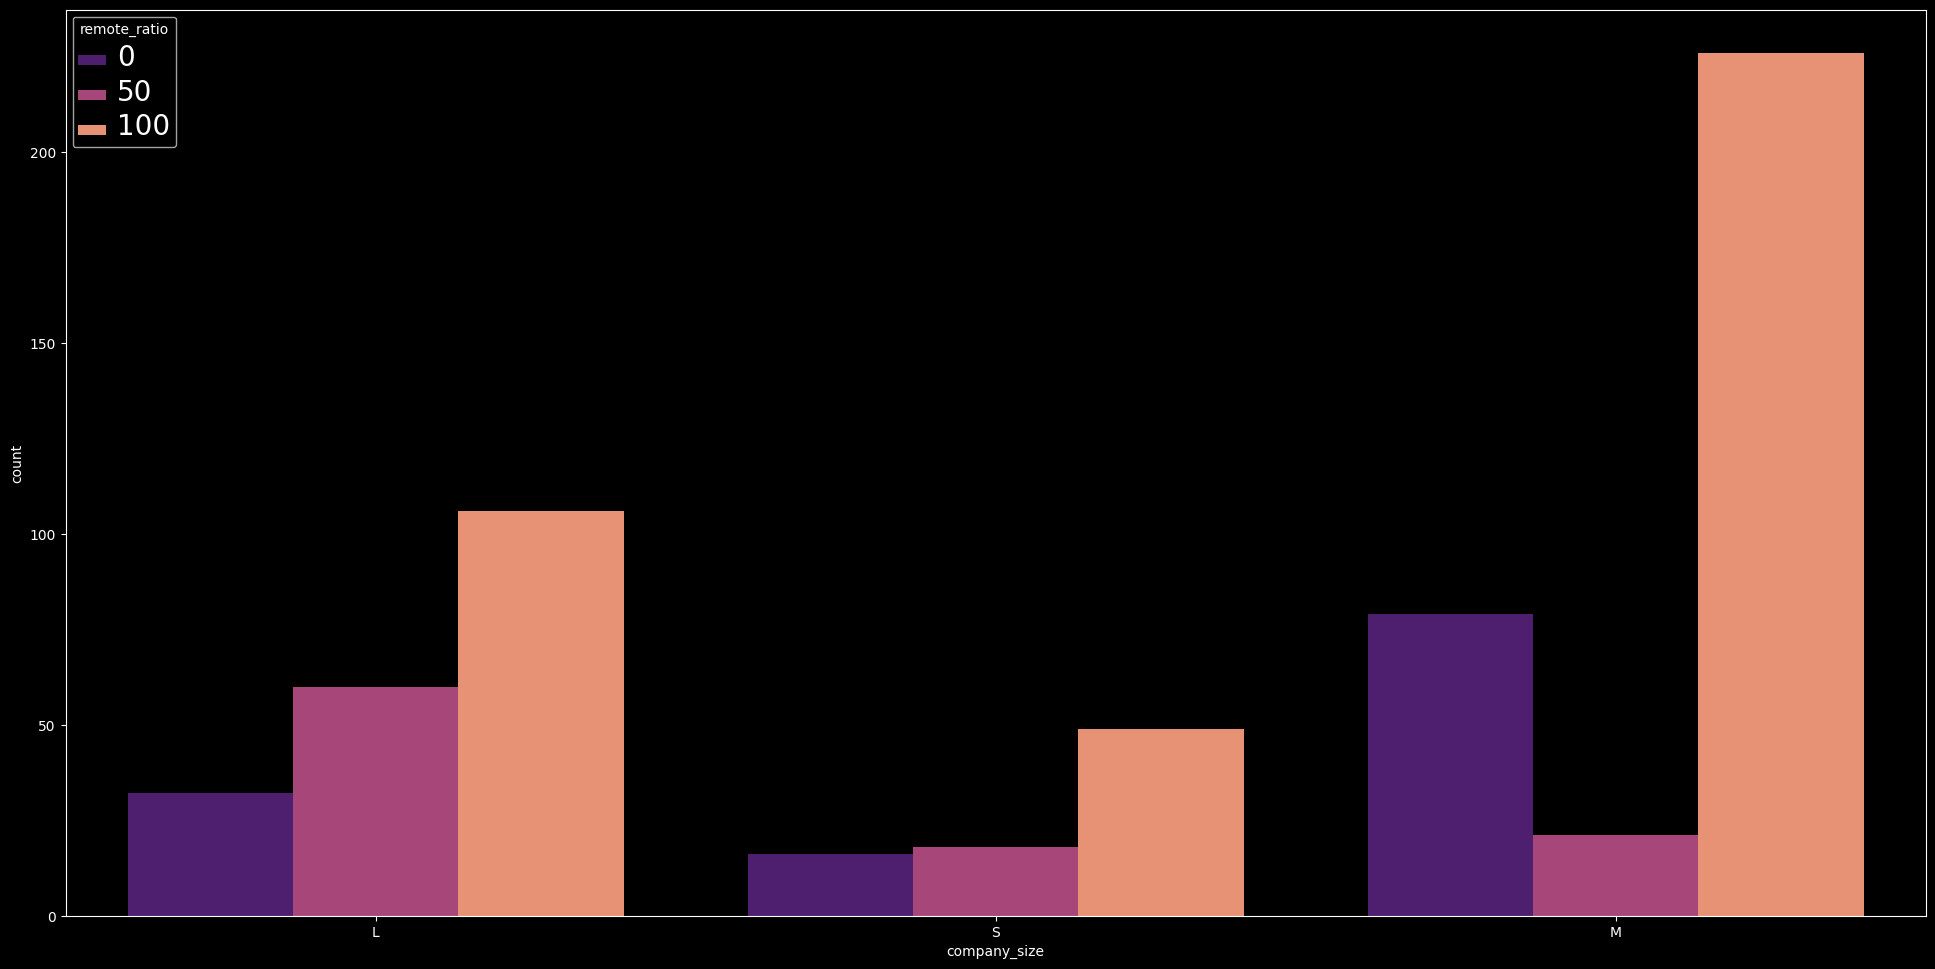

In [17]:
fig=plt.figure()
plt.style.use('dark_background')
plt.figure(figsize=(24, 12), dpi=100)
gfg=sns.countplot(data=df, x="company_size", hue="remote_ratio",palette = 'magma')
plt.setp(gfg.get_legend().get_texts(), fontsize='20') 

plt.savefig("dark.png")

**what is experience_level for every company_size**

<Figure size 432x288 with 0 Axes>

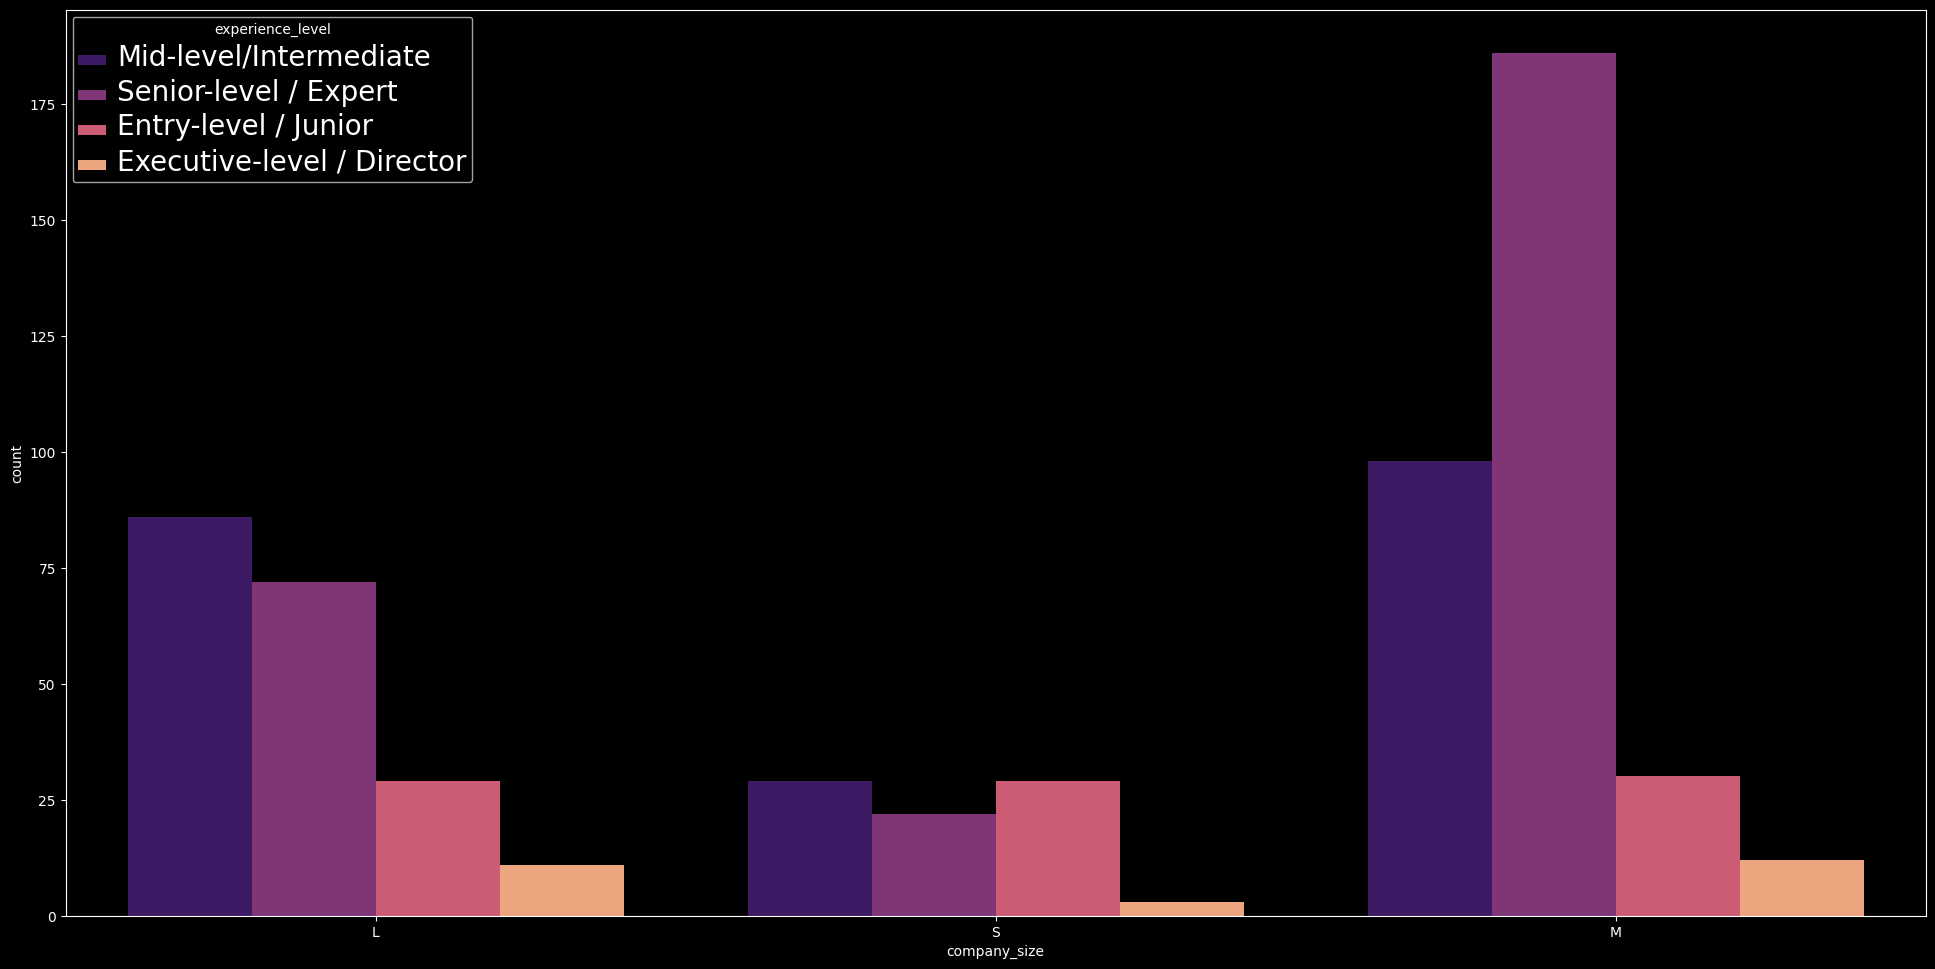

In [18]:
fig=plt.figure()
plt.style.use('dark_background')
plt.figure(figsize=(24, 12), dpi=100)
gfg = sns.countplot(data=df, x="company_size", hue="experience_level",palette = 'magma')

plt.savefig("dark.png")
plt.setp(gfg.get_legend().get_texts(), fontsize='20') 
plt.show()

# **salary exploretion**

**first let's see the most year The year the salary was paid.**

In [19]:
Work_Year_perc=df["work_year"].value_counts()

fig=px.pie(df,values=Work_Year_perc.values,
           names=Work_Year_perc.index,
           color=Work_Year_perc.index,
           title='Work_Year_perc',
           template='plotly_dark')
fig.show()

**let's see the average of salary_in_usd**

In [20]:
fig=px.box(df,y="salary_in_usd",
          title='ave_salary_in_usd',
           template='plotly_dark')
fig.show()

**sec:let's show the most job_title get more salary**

In [21]:
b= df.groupby(['salary_in_usd','job_title']).size().reset_index()
b=b[-20:]

fig = px.bar(x=b["job_title"], y=b["salary_in_usd"], color=b["salary_in_usd"],title="salary by job titel", template='plotly_dark')
fig.show()



**is the company_size affects on salary ?**

In [22]:
b=df.groupby("company_size")["salary_in_usd"].mean().reset_index()
b


,company_size,salary_in_usd
0,L,119242.994949
1,M,116905.466258
2,S,77632.674699


In [23]:
fig = px.bar(b, x ="company_size", y ="salary_in_usd" ,color ="salary_in_usd" , template='plotly_dark')
 
fig.show()

**yes the more large company the more salary**

**let's show it by line**

In [24]:
fig = px.line(b, x="salary_in_usd", y="company_size", title='Life expectancy in Canada')
fig.show()

**let's see the ave experience_level salary_in_usd**

In [25]:
b=df.groupby("experience_level")["salary_in_usd"].mean().reset_index()
b


,experience_level,salary_in_usd
0,Entry-level / Junior,61643.318182
1,Executive-level / Director,199392.038462
2,Mid-level/Intermediate,87996.056338
3,Senior-level / Expert,138617.292857


In [26]:
fig = px.bar(b, x="experience_level",  y="salary_in_usd" ,color="salary_in_usd" , template='plotly_dark')
 
fig.show()

In [27]:
df_num = df[['work_year', 'salary_in_usd',   'remote_ratio']]

               work_year  salary_in_usd  remote_ratio
work_year       1.000000       0.170493      0.076314
salary_in_usd   0.170493       1.000000      0.132122
remote_ratio    0.076314       0.132122      1.000000


<AxesSubplot:>

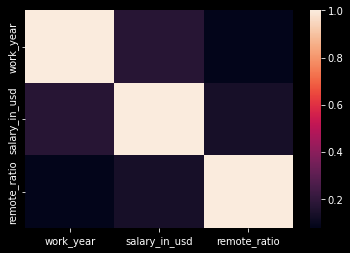

In [28]:
print(df_num.corr())
sns.heatmap(df_num.corr())
